In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [217]:
data = pd.read_csv('danang_weather_1957_2020.csv')
data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DEWP,DEWP_ATTRIBUTES,FRSHTT,FRSHTT_ATTRIBUTES,...,SNDP,SNDP_ATTRIBUTES,STP,STP_ATTRIBUTES,TEMP,TEMP_ATTRIBUTES,VISIB,VISIB_ATTRIBUTES,WDSP,WDSP_ATTRIBUTES
0,48855099999,"DANANG INTERNATIONAL, VM",16.043917,108.19937,10.05,1957-01-01,59.7,8,0,NaN,...,999.9,NaN,15.4,8,68.5,8,16.7,8,2.8,8
1,48855099999,"DANANG INTERNATIONAL, VM",16.043917,108.19937,10.05,1957-01-02,61.5,8,0,NaN,...,999.9,NaN,14.6,8,67.6,8,19.9,8,3.5,8
2,48855099999,"DANANG INTERNATIONAL, VM",16.043917,108.19937,10.05,1957-01-03,62.5,8,0,NaN,...,999.9,NaN,13.9,8,68.4,8,17.4,8,1.8,8
3,48855099999,"DANANG INTERNATIONAL, VM",16.043917,108.19937,10.05,1957-01-04,65.1,8,10000,NaN,...,999.9,NaN,14.3,8,71.0,8,13.3,8,9.1,8
4,48855099999,"DANANG INTERNATIONAL, VM",16.043917,108.19937,10.05,1957-01-05,67.4,8,10000,NaN,...,999.9,NaN,14.3,8,70.2,8,5.9,8,4.8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21888,48855099999,"DANANG INTERNATIONAL, VM",16.043917,108.19937,10.05,2020-12-22,61.2,24,10000,NaN,...,999.9,NaN,999.9,0,68.5,24,6.0,24,2.3,24
21889,48855099999,"DANANG INTERNATIONAL, VM",16.043917,108.19937,10.05,2020-12-23,63.6,24,0,NaN,...,999.9,NaN,999.9,0,71.6,24,6.0,24,3.1,24
21890,48855099999,"DANANG INTERNATIONAL, VM",16.043917,108.19937,10.05,2020-12-24,66.6,24,10000,NaN,...,999.9,NaN,999.9,0,70.7,24,4.5,24,3.3,24
21891,48855099999,"DANANG INTERNATIONAL, VM",16.043917,108.19937,10.05,2020-12-25,68.0,24,10000,NaN,...,999.9,NaN,999.9,0,70.8,24,5.0,24,2.0,24


In [218]:
data.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DEWP',
       'DEWP_ATTRIBUTES', 'FRSHTT', 'FRSHTT_ATTRIBUTES', 'GUST',
       'GUST_ATTRIBUTES', 'MAX', 'MAX_ATTRIBUTES', 'MIN', 'MIN_ATTRIBUTES',
       'MXSPD', 'MXSPD_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SLP',
       'SLP_ATTRIBUTES', 'SNDP', 'SNDP_ATTRIBUTES', 'STP', 'STP_ATTRIBUTES',
       'TEMP', 'TEMP_ATTRIBUTES', 'VISIB', 'VISIB_ATTRIBUTES', 'WDSP',
       'WDSP_ATTRIBUTES'],
      dtype='object')

Xoá một số cột không cần thiết: 
   - Các cột ATTRIBUTES (thường chỉ ra số lần quan trắc để lấy dữ liệu).
   - STATION, NAME, LATITUDE, LONGTITIDE, ELEVATION (chỉ ra mã, tên, toạ độ và cao độ của trạm quan trắc, xoá vì số liệu chỉ lấy từ 1 trạm duy nhất).
   - GUST (xoá vì 99% số dòng thiếu số liệu).
   - SNDP (toàn bộ các dòng không có số liệu). 

In [219]:
data.drop(data.filter(like='ATTRIBUTES',axis=1).columns, axis=1, inplace=True)
data.drop(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE','ELEVATION','GUST','SNDP'], axis=1, errors='ignore', inplace=True)
data

,DATE,DEWP,FRSHTT,MAX,MIN,MXSPD,PRCP,SLP,STP,TEMP,VISIB,WDSP
0,1957-01-01,59.7,0,79.3,60.3,8.0,0.00,1016.3,15.4,68.5,16.7,2.8
1,1957-01-02,61.5,0,75.4,60.3,13.0,0.00,1015.4,14.6,67.6,19.9,3.5
2,1957-01-03,62.5,0,76.3,58.3,7.0,0.00,1015.4,13.9,68.4,17.4,1.8
3,1957-01-04,65.1,10000,75.4,64.4,15.0,99.99,1015.2,14.3,71.0,13.3,9.1
4,1957-01-05,67.4,10000,74.3,67.3,13.0,99.99,1015.1,14.3,70.2,5.9,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...
21888,2020-12-22,61.2,10000,71.6,65.5,6.0,0.00,9999.9,999.9,68.5,6.0,2.3
21889,2020-12-23,63.6,0,75.2,67.3,8.9,0.00,9999.9,999.9,71.6,6.0,3.1
21890,2020-12-24,66.6,10000,75.2,68.0,8.0,0.02,9999.9,999.9,70.7,4.5,3.3
21891,2020-12-25,68.0,10000,73.4,68.2,5.1,0.09,9999.9,999.9,70.8,5.0,2.0


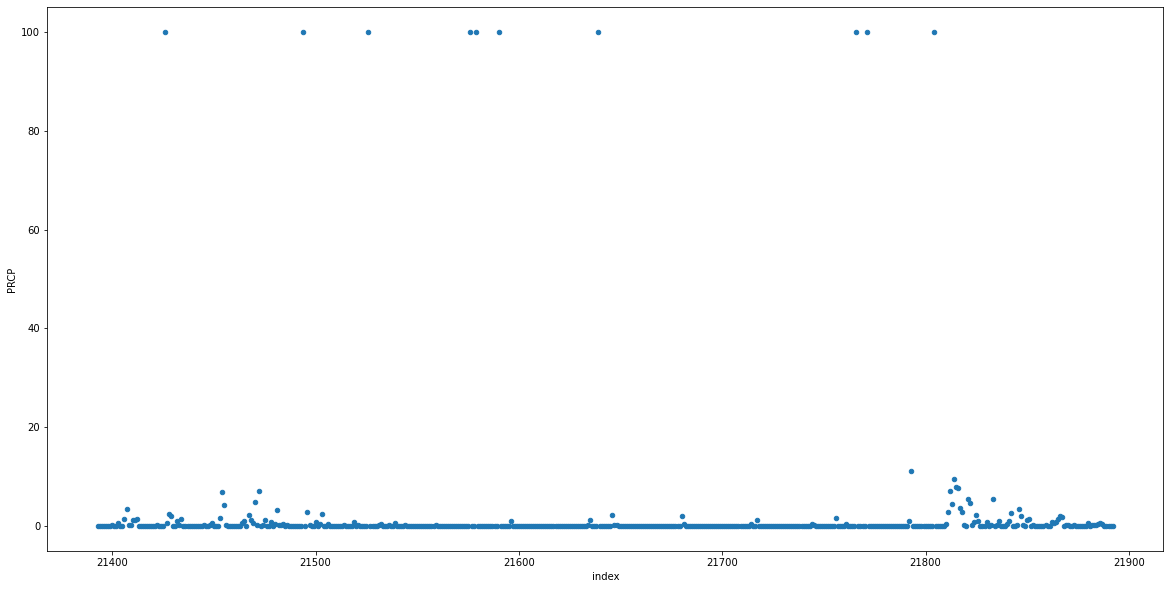

In [220]:
prcp = data['PRCP']
prcp.tail(500).reset_index().plot(x='index',y='PRCP',kind='scatter', figsize=(20,10))

Một số điểm dữ liệu bị thiếu (có giá trị 99.99) sẽ được thêm vào bằng cách lấy giá trị trung bình của 2 điểm lân cận.

(-5.0, 105.0)

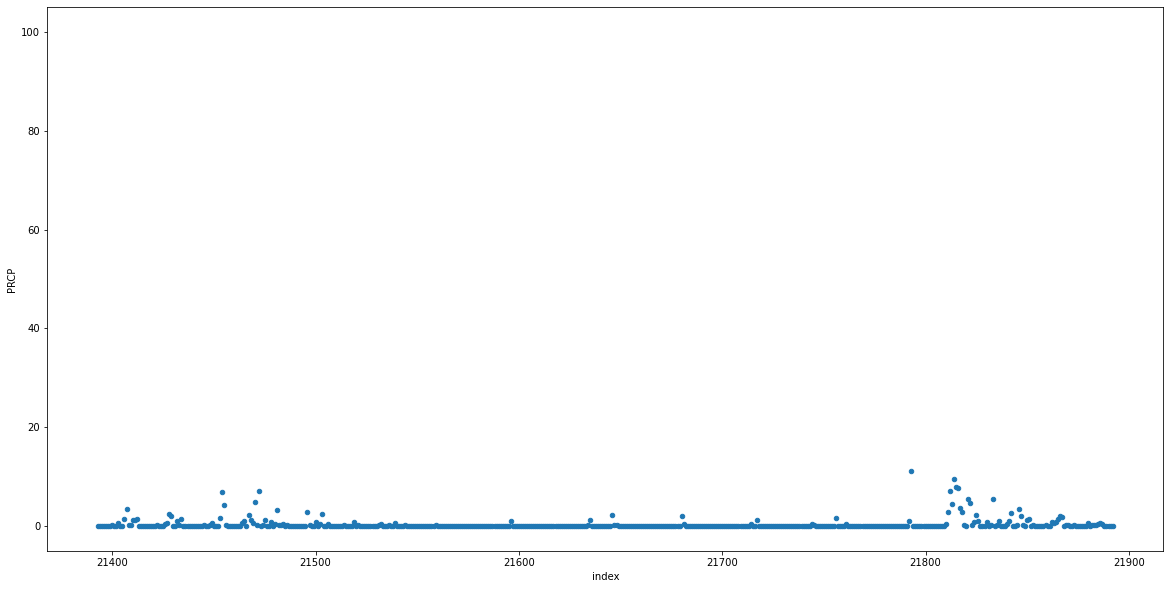

In [221]:
prcp.replace(to_replace = 99.99, value = np.nan, inplace = True) #thay thế giá trị 99.99 bằng NaN
prcp.interpolate(method = 'linear', inplace=True) #thay thế các giá trị NaN bằng trung bình của 2 điểm lân cận

plt = prcp.tail(500).reset_index().plot(x='index',y='PRCP',kind='scatter', figsize=(20,10))
plt.set_ylim(-5,105)

998.3     0.004568
27.2      0.004568
994.4     0.004568
995.9     0.004568
24.1      0.004568
           ...    
4.8       0.342575
4.5       0.351711
5.2       0.360846
6.3       0.369981
999.9    58.055086
Name: STP, Length: 284, dtype: float64

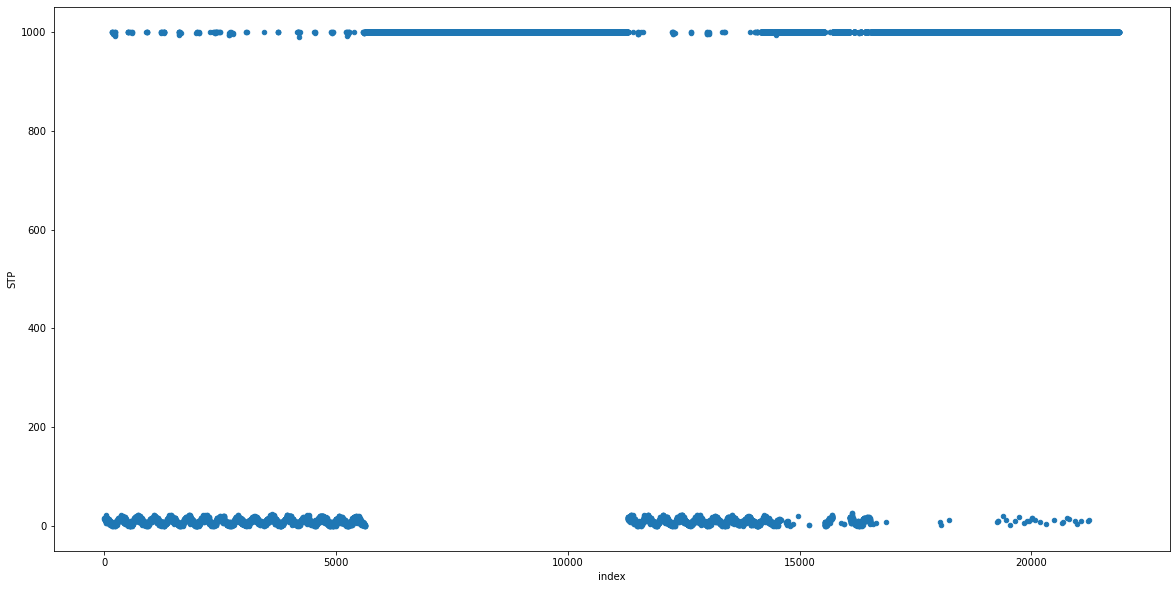

In [225]:
stp = data['STP']
#stp.replace(to_replace = 999.9, value = np.nan, inplace = True)
stp.reset_index().plot(x='index',y='STP',kind='scatter', figsize=(20,10))
stp.value_counts().sort_values()/21893*100

In [3]:
df = pd.read_csv('weatherdata-1611081.csv', index_col=False)
df

,Date,Longitude,Latitude,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar
0,1/1/1979,108.125,16.0798,21,21.789,20.032,8.433718,2.442694,0.945526,6.279357
1,1/2/1979,108.125,16.0798,21,22.050,19.974,1.917458,2.021508,0.923605,4.131790
2,1/3/1979,108.125,16.0798,21,22.847,19.485,0.520134,1.363726,0.865097,6.813003
3,1/4/1979,108.125,16.0798,21,22.304,18.682,0.224876,1.887963,0.862533,9.143603
4,1/5/1979,108.125,16.0798,21,23.549,19.568,0.509834,2.179407,0.865400,10.840449
...,...,...,...,...,...,...,...,...,...,...
12923,7/27/2014,108.125,16.0798,21,27.654,22.145,123.403941,0.722276,0.960563,11.988250
12924,7/28/2014,108.125,16.0798,21,27.882,22.253,38.002393,0.805266,0.950569,21.488302
12925,7/29/2014,108.125,16.0798,21,28.599,20.573,20.422551,0.824725,0.943231,9.977630
12926,7/30/2014,108.125,16.0798,21,27.441,21.986,24.712369,1.054239,0.960196,23.610801


In [4]:
df.drop(['Longitude','Latitude','Elevation'], axis=1, errors='ignore', inplace=True)
df

,Date,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar
0,1/1/1979,21.789,20.032,8.433718,2.442694,0.945526,6.279357
1,1/2/1979,22.050,19.974,1.917458,2.021508,0.923605,4.131790
2,1/3/1979,22.847,19.485,0.520134,1.363726,0.865097,6.813003
3,1/4/1979,22.304,18.682,0.224876,1.887963,0.862533,9.143603
4,1/5/1979,23.549,19.568,0.509834,2.179407,0.865400,10.840449
...,...,...,...,...,...,...,...
12923,7/27/2014,27.654,22.145,123.403941,0.722276,0.960563,11.988250
12924,7/28/2014,27.882,22.253,38.002393,0.805266,0.950569,21.488302
12925,7/29/2014,28.599,20.573,20.422551,0.824725,0.943231,9.977630
12926,7/30/2014,27.441,21.986,24.712369,1.054239,0.960196,23.610801


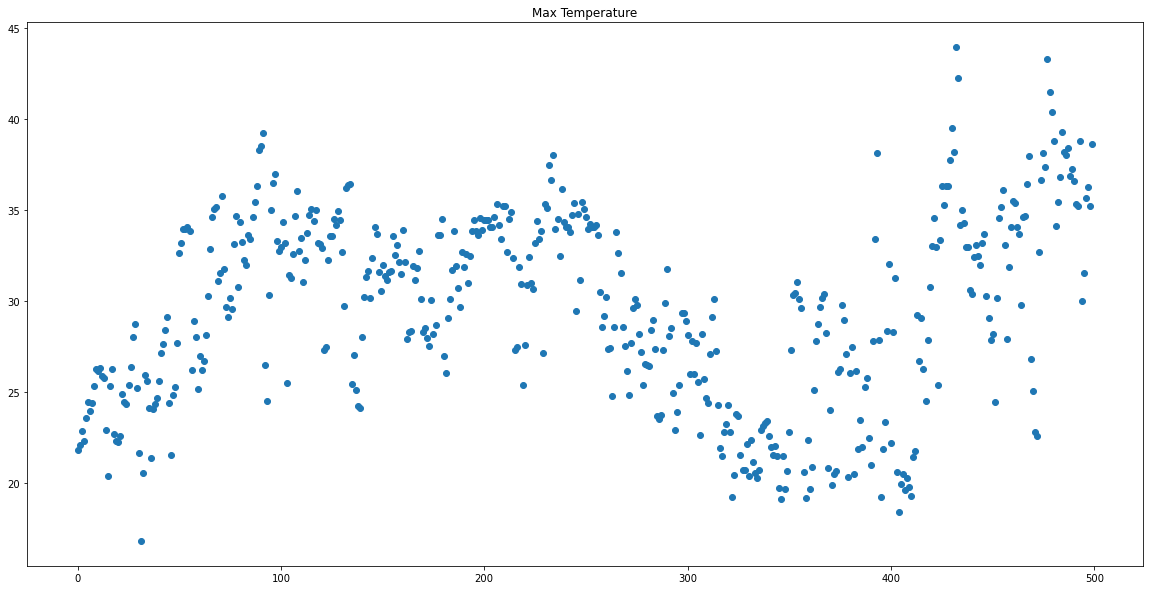

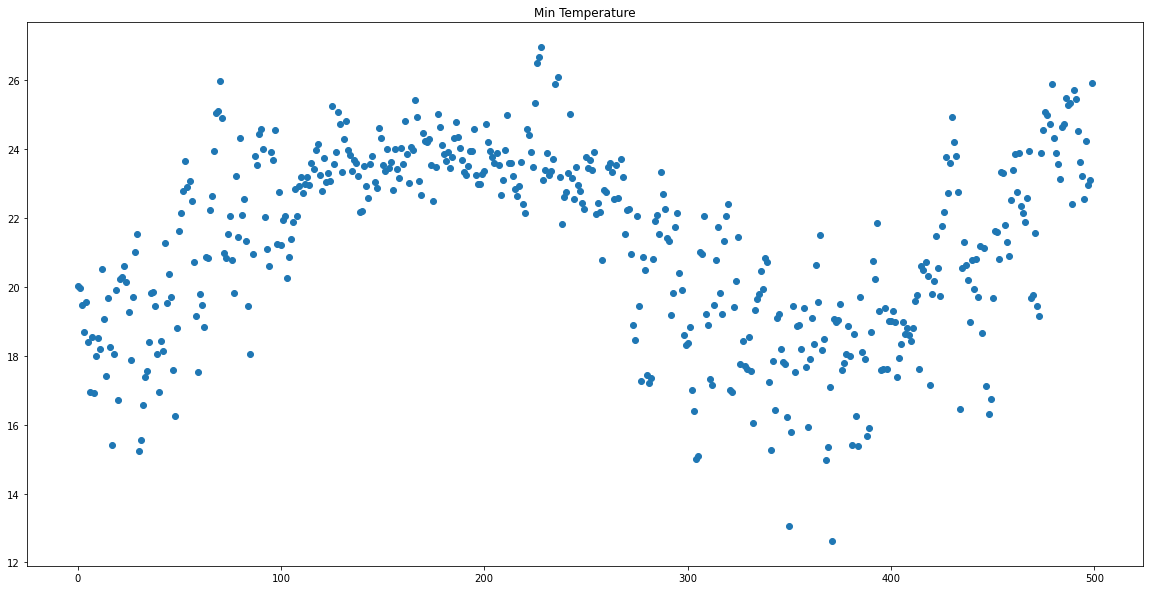

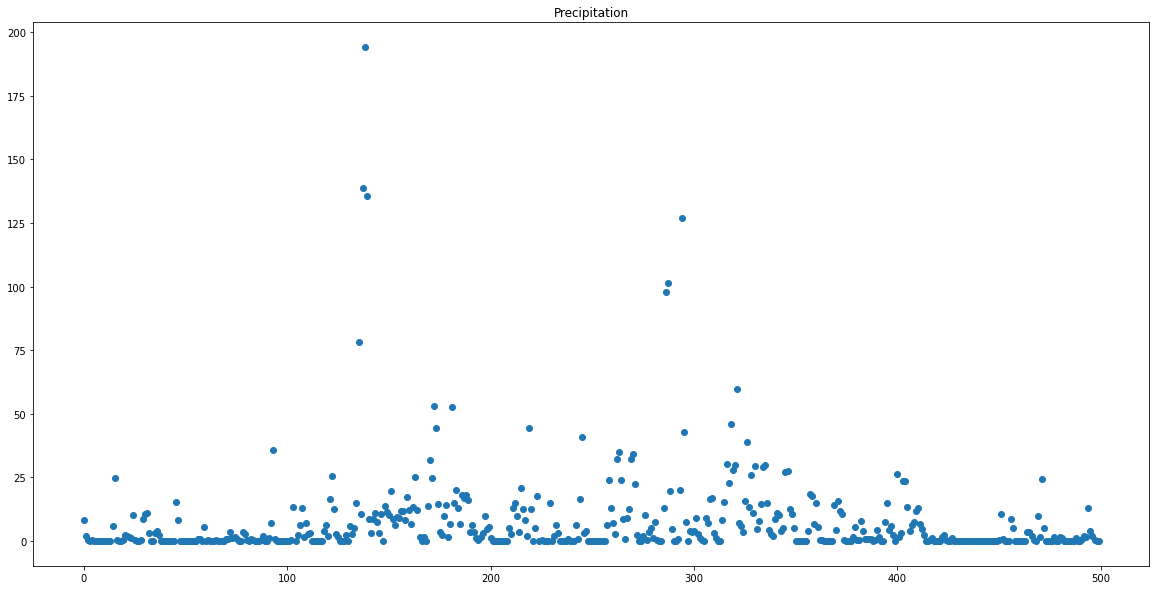

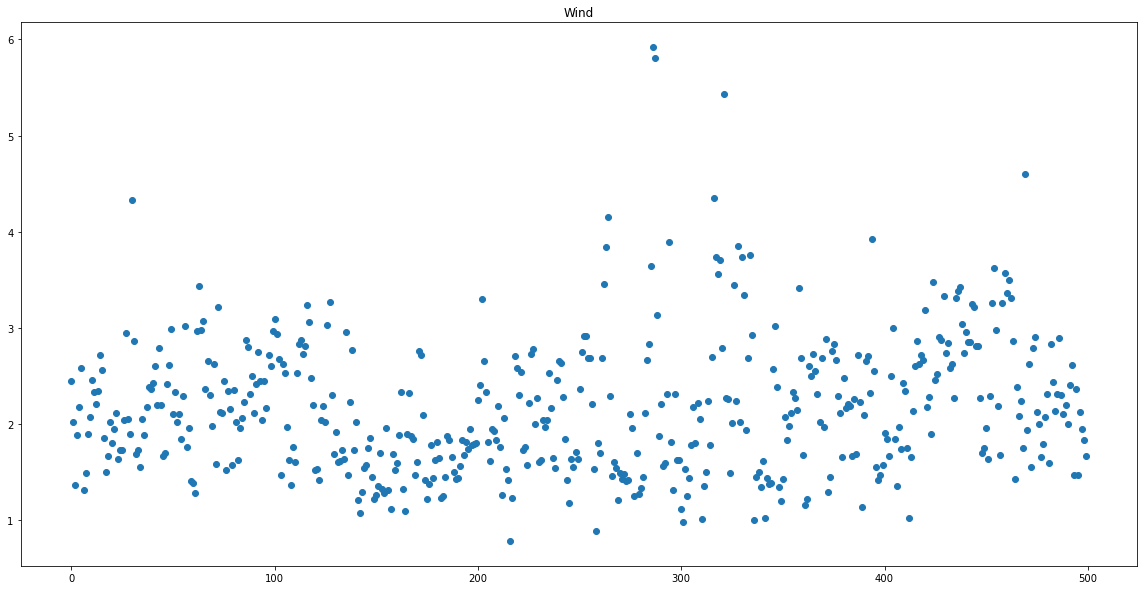

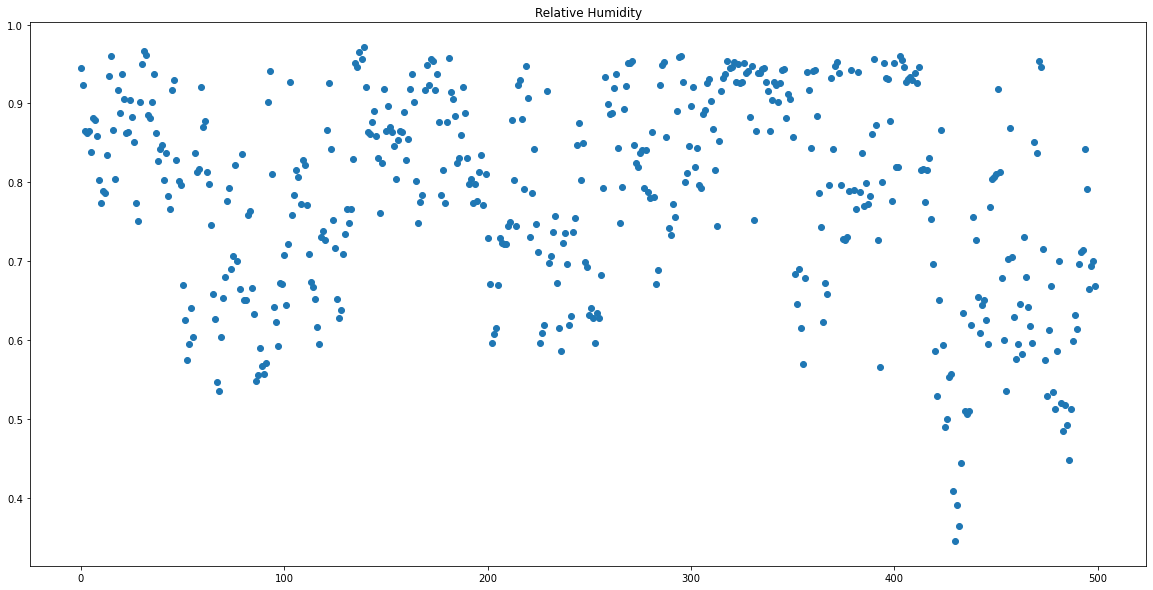

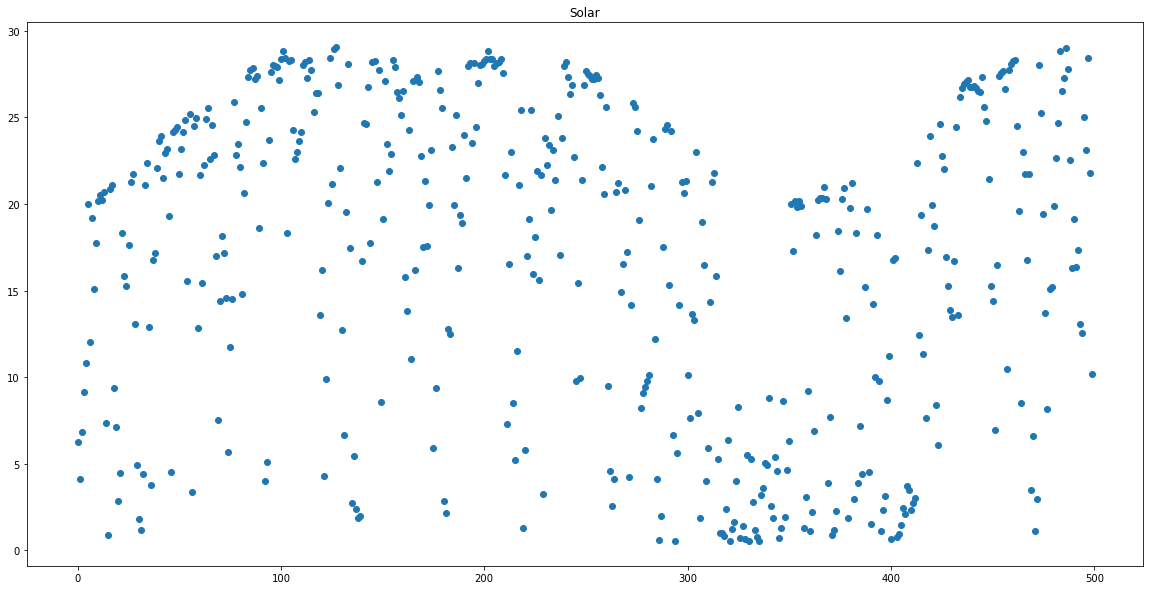

In [16]:
for col in ['Max Temperature', 'Min Temperature', 'Precipitation', 'Wind', 'Relative Humidity', 'Solar']:
    plt.figure(figsize=(20,10))
    plt.scatter(pd.RangeIndex(start=0, stop=500, step=1), df[col].head(500))
    plt.title(label=col)

In [10]:
pd.RangeIndex(start=0, stop=500, step=1)

RangeIndex(start=0, stop=500, step=1)